In [169]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [170]:
def gaussian_noise(source_folder, destination_folder, kernel_size=5):
    # Obtener la lista de archivos de la carpeta
    files_list = os.listdir(source_folder)
    image_names = []
    # Iteramos sobre cada archivo y agregamos solo los archivos de imagen a la lista
    for file_name in files_list:
        # Agregamos el nombre del archivo a la lista de nombres de imagenes
        image_names.append(file_name)

    # Iteramos sobre cada imagen
    for image_name in image_names:
        # Creamos la ruta completa del archivo de imagen
        image_path = os.path.join(source_folder, image_name)
        image = cv2.imread(image_path)

        # Aplicamos el filtro de ruido gaussiano
        noisy_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

        # Creamos el nombre del archivo de salida y la ruta completa
        new_name = f"{os.path.splitext(image_name)[0]}_gaussian.png"
        destination_path = os.path.join(destination_folder, new_name)

        # Guardamos la imagen con ruido gaussiano en la carpeta de destino
        cv2.imwrite(destination_path, noisy_image)


In [171]:
def umbralizado_t(source_folder, destination_folder, tipo):
    # Obtener la lista de archivos de la carpeta
    files_list = os.listdir(source_folder)
    image_names = []
    # Iteramos sobre cada archivo y agregamos solo los archivos de imagen a la lista
    for file_name in files_list:
        # Agregamos el nombre del archivo a la lista de nombres de imagenes
        image_names.append(file_name)

    # Iteramos sobre cada imagen
    for image_name in image_names:
        # Creamos la ruta completa del archivo de imagen
        image_path = os.path.join(source_folder, image_name)
        
        image = cv2.imread(image_path)

        # Aplicamos el filtro de ruido gaussiano
        # Aplicamos el filtro de ruido gaussiano y umbralización
        if tipo==0:
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            _, img_byn = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)
        elif tipo==1:
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            img_byn = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
        if tipo==2:
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            _, img_byn = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # Creamos el nombre del archivo de salida y la ruta completa
        new_name = f"{os.path.splitext(image_name)[0]}_gaussian.png"
        destination_path = os.path.join(destination_folder, new_name)

        # Guardamos la imagen con ruido gaussiano en la carpeta de destino
        cv2.imwrite(destination_path, img_byn)


In [172]:
def segmentacion_por_contornos(ruta_imagenes, ruta_salida):
    # Obtener una lista de todos los archivos de imagen en la carpeta
    archivos_imagen = [os.path.join(ruta_imagenes, archivo) for archivo in os.listdir(ruta_imagenes)
                       if archivo.endswith('.jpg') or archivo.endswith('.jpeg') or archivo.endswith('.png')]

    if not archivos_imagen:
        print("No se encontraron imágenes para segmentar en la carpeta.")
        return

    # Iterar sobre cada imagen y aplicar la segmentación por contornos
    for archivo in archivos_imagen:
        imagen = cv2.imread(archivo) 
        # Convertir la imagen a escala de grises
        gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

        # Aplicar la umbralización de la imagen
        _, umbralizada = cv2.threshold(gris, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Buscar los contornos en la imagen umbralizada
        _, contornos, _ = cv2.findContours(umbralizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Dibujar los contornos sobre la imagen original
        cv2.drawContours(imagen, contornos, -1, (0, 0, 255), 2)

        # Crear la ruta completa del archivo de imagen de salida
        nombre_archivo = os.path.splitext(os.path.basename(archivo))[0] + '_contornos.png'
        ruta_salida_imagen = os.path.join(ruta_salida, nombre_archivo)

        # Guardar la imagen con los contornos dibujados
        cv2.imwrite(ruta_salida_imagen, imagen)

    print('¡Segmentacion por contornos finalizada!')


In [173]:
def segmentacion_watershed(ruta_carpeta, ruta_salida):
    # Obtener una lista de todos los archivos en la carpeta
    archivos_imagen = obtener_archivos_imagen(ruta_carpeta)

    # Aplicar segmentación watershed a cada imagen y agregarla a la lista
    for archivo in archivos_imagen:
        img = cv2.imread(archivo)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        th_bin_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV)[1]
        ero_img = cv2.erode(th_bin_img, np.ones((15, 15), np.uint8), iterations=1)
        markers = cv2.connectedComponents(ero_img)[1]
        markers = cv2.watershed(img, markers)
        img[markers == -1] = [255, 0, 0]
        img_segmentada = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

        # Crear la ruta y el nombre de archivo para la imagen segmentada de salida
        nombre_archivo = os.path.splitext(os.path.basename(archivo))[0] + '_segmentada.png'
        ruta_archivo_salida = os.path.join(ruta_salida, nombre_archivo)

        # Guardar la imagen segmentada en la carpeta de salida
        img_segmentada.save(ruta_archivo_salida)
        mostrar_segmentacion(markers)

def obtener_archivos_imagen(ruta_carpeta):
    extensiones_imagen = ['.png']
    archivos_imagen = [os.path.join(ruta_carpeta, archivo) for archivo in os.listdir(ruta_carpeta) if
                       os.path.splitext(archivo)[1].lower() in extensiones_imagen]
    if not archivos_imagen:
        print("No se encontraron imágenes para segmentar en la carpeta.")
    return archivos_imagen
def mostrar_segmentacion(markers):
    print('Segmented regions:', np.max(markers))
    plt.axis("off")
    plt.title('Segmented regions')
    plt.imshow(markers, cmap='twilight')
    plt.show()

Segmented regions: 1


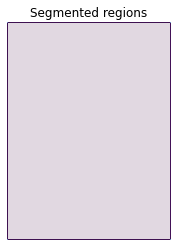

Segmented regions: 7


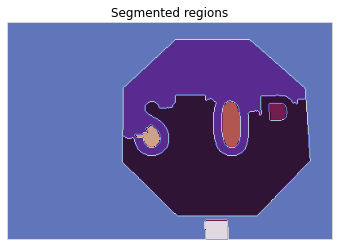

Segmented regions: 3


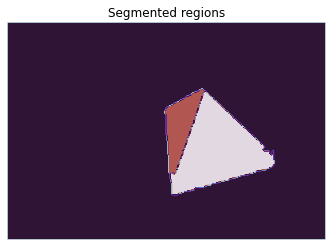

Segmented regions: 7


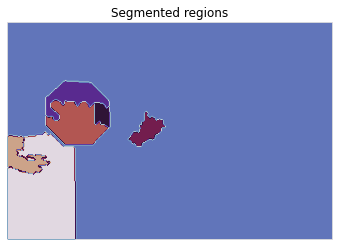

Segmented regions: 3


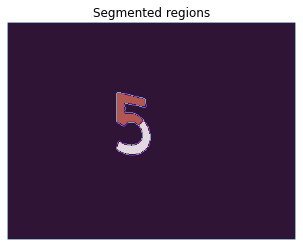

Segmented regions: 10


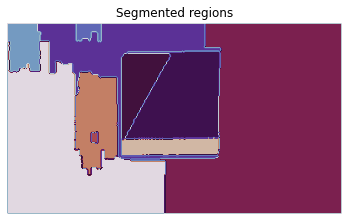

Segmented regions: 9


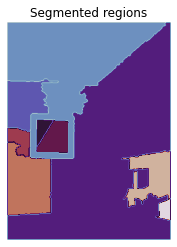

Segmented regions: 17


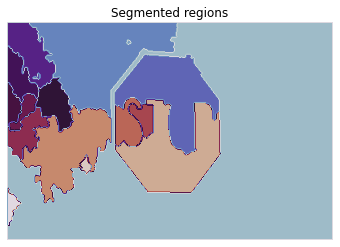

Segmented regions: 14


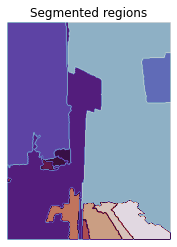

Segmented regions: 19


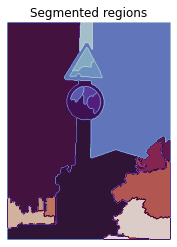

¡Segmentacion por contornos finalizada!


In [174]:
#Funcion para que ejecute:
Color = '/home/jeza/Descargas/Procesamiento_imagenes/Tarea_imagenes/Originales'
U_global  = '/home/jeza/Descargas/Procesamiento_imagenes/Tarea_imagenes/U_global'
U_adaptativa = '/home/jeza/Descargas/Procesamiento_imagenes/Tarea_imagenes/U_adaptativa'
U_otsu = '/home/jeza/Descargas/Procesamiento_imagenes/Tarea_imagenes/U_otsu'
Seg_water = '/home/jeza/Descargas/Procesamiento_imagenes/Tarea_imagenes/Seg_wat'
Contronos ='/home/jeza/Descargas/Procesamiento_imagenes/Tarea_imagenes/Contornos'
Gauss='/home/jeza/Descargas/Procesamiento_imagenes/Tarea_imagenes/Gauss'
Glb_Gauss='/home/jeza/Descargas/Procesamiento_imagenes/Tarea_imagenes/G_Gauss'
Ad_Gauss='/home/jeza/Descargas/Procesamiento_imagenes/Tarea_imagenes/Ad_Gauss'
Cont_Gauss='/home/jeza/Descargas/Procesamiento_imagenes/Tarea_imagenes/Cont_Gauss'
Otsu_Gauss='/home/jeza/Descargas/Procesamiento_imagenes/Tarea_imagenes/Otsu_Gauss'
Gauss_w='/home/jeza/Descargas/Procesamiento_imagenes/Tarea_imagenes/Gauss_w'
umbralizado_t(Color,U_global,0)
umbralizado_t(Color,U_adaptativa,1)
umbralizado_t(Color,U_otsu,2)
segmentacion_watershed(Color,Seg_water)
segmentacion_por_contornos(Color,Contronos)
gaussian_noise(Color,Gauss)
gaussian_noise(U_global,Glb_Gauss)
gaussian_noise(U_adaptativa,Ad_Gauss)
gaussian_noise(U_otsu,Otsu_Gauss)
gaussian_noise(Contronos,Cont_Gauss)
gaussian_noise(Seg_water,Gauss_w)


